# Week 3

### Section 3

##### Read in Gold data

In [231]:
import pandas as pd

In [232]:
df = pd.read_csv('GOLD.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


#### Number of missing values in each column:

In [233]:
df.isna().sum()

Date          0
Price         0
Open          0
High          0
Low           0
Vol.          0
Change %      0
Pred        101
new           0
dtype: int64

In [234]:
df.shape

(512, 9)

In [235]:
df_train = df.dropna()
df_train.shape

(411, 9)

#### Linear regression to predict 'new' column

In [236]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
X = df[['Open', 'High', 'Low', 'Price']]
y = df['new']
Y = lm.fit(X, y).predict(X)
print(f'Sum of sqare errors: {sum((Y - y)**2)}')
print(f'MSE: {lm.fit(X, y).score(X, y)}')

Sum of sqare errors: 245.29512134007808
MSE: 0.9999886649319772


#### Linear regression to predict 'Pred' column

In [237]:
X = df_train[['Open', 'High', 'Low', 'Price']]
y = df_train['Pred']
Y = lm.fit(X, y).predict(X)
print(f'Sum of sqare errors: {sum((Y - y)**2)}')
print(f'MSE: {lm.fit(X, y).score(X, y)}')

Sum of sqare errors: 7.163083605502316e-21
MSE: 1.0


This clearly shows that the 'Pred' column is a linear combination of the OHLC columns.
And, the 'new' column is not.

#### Predicting missing values for 'Pred' column

In [238]:
missing = df[df['Pred'].isna()].copy()
missing['Pred'] = lm.predict(missing[['Open', 'High', 'Low', 'Price']])
missing

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
411,"Dec 11, 2018",31812,31850,31850,31618,10.53K,-0.26%,852.0,195.423493
412,"Dec 12, 2018",31626,31749,31749,31582,7.57K,-0.58%,422.0,44.232664
413,"Dec 13, 2018",31414,31550,31600,31337,8.43K,-0.67%,530.0,127.646233
414,"Dec 14, 2018",31437,31440,31514,31384,6.75K,0.07%,144.0,127.219539
415,"Dec 17, 2018",31501,31369,31530,31291,5.97K,0.20%,415.0,372.603976
...,...,...,...,...,...,...,...,...,...
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,535.0,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,438.0,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,269.0,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,601.0,48.365693


#### Heatmaps

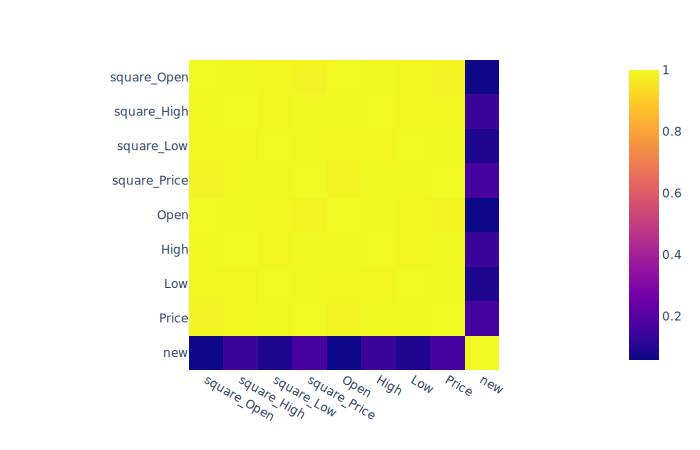

In [239]:
import plotly.express as px
df_2 = df[['Open', 'High', 'Low', 'Price']]**2
df_2 = pd.concat([df_2.add_prefix('square_'), df[['Open', 'High', 'Low', 'Price', 'new']]], axis = 1)
fig = px.imshow(df_2.corr(), x = df_2.columns, y = df_2.columns)
fig.show('svg')

The heatmap shows that the 'new' column is a polynomial combination of the OHLC columns.

#### Calculation of $\mathbf{\beta}$ for HDFC stock w.r.t Nifty Index

In [240]:
benchmark = pd.read_csv('Nifty50/Nifty50.csv')
stock = pd.read_csv('week2.csv')

In [241]:
benchmark['Day_Perc_Change'] = benchmark['Close'].pct_change().fillna(0)*100
stock['Day_Perc_Change'] = stock['Close Price'].pct_change().fillna(0)*100

In [242]:
stock['Date'] = stock['Date'].astype('datetime64')
stock['Day_of_Month'] = stock['Date'].dt.day

In [243]:
all(benchmark['Date'].astype('datetime64') == stock['Date'])

True

In [244]:
combined = pd.concat([benchmark.add_prefix('benchmark_'), stock.add_prefix('stock_')], axis = 1)
combined.head()

,benchmark_Date,benchmark_Open,benchmark_High,benchmark_Low,benchmark_Close,benchmark_Shares Traded,benchmark_Turnover (Rs. Cr),benchmark_Day_Perc_Change,stock_Unnamed: 0,stock_Symbol,...,stock_Total Traded Quantity,stock_Turnover,stock_No. of Trades,stock_Deliverable Qty,stock_% Dly Qt to Traded Qty,stock_Month,stock_Year,stock_Day_Perc_Change,stock_Trend,stock_Day_of_Month
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97,0.000000,0,HDFC,...,1270297,1.984990e+09,59917,955875,75.25,5,2017,0.000000,Slight or no change,15
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89,0.707752,2,HDFC,...,2114918,3.307844e+09,79354,1652379,78.13,5,2017,0.452068,Slight or no change,16
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23,0.141922,3,HDFC,...,2161434,3.365526e+09,80317,1794472,83.02,5,2017,-0.896875,Slight negative,17
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46,-1.010944,5,HDFC,...,2404372,3.700407e+09,85842,1837821,76.44,5,2017,-0.995169,Slight negative,18
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77,-0.016438,7,HDFC,...,2142433,3.269652e+09,113875,1601236,74.74,5,2017,-1.070232,Negative,19


In [245]:
assert all(combined.sort_values('stock_Date') == combined)

In [246]:
import scipy.stats as stats
beta, alpha, *_ = stats.linregress(combined['stock_Day_Perc_Change'].values[1:], 
                                   combined['benchmark_Day_Perc_Change'].values[1:])
print(f'beta for weekly returns is {beta}')

beta for weekly returns is 0.321231779430021


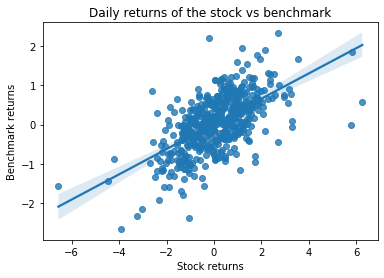

In [247]:
sns.regplot(x = combined['stock_Day_Perc_Change'].values[1:], 
            y = combined['benchmark_Day_Perc_Change'].values[1:])
plt.xlabel('Stock returns')
plt.ylabel('Benchmark returns')
plt.title('Daily returns of the stock vs benchmark')
plt.show()

In [248]:
monthly = combined.groupby(['stock_Year', 'stock_Month']).nth(-1)
beta, alpha, *_ = stats.linregress(monthly['stock_Day_Perc_Change'].values[1:], 
                                   monthly['benchmark_Day_Perc_Change'].values[1:])
print(f'beta for monthly returns is {beta}')

beta for monthly returns is 0.3177554923803718


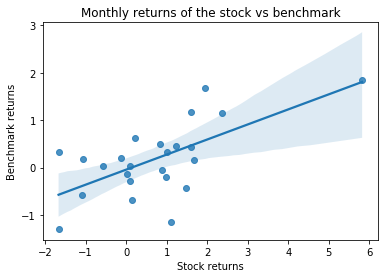

In [249]:
sns.regplot(x = monthly['stock_Day_Perc_Change'].values[1:], 
            y = monthly['benchmark_Day_Perc_Change'].values[1:])
plt.xlabel('Stock returns')
plt.ylabel('Benchmark returns')
plt.title('Monthly returns of the stock vs benchmark')
plt.show()

The $\beta$ value is quite low and notably below 1, signifying that the stock does not move as much compared to the index. A negative value of $\beta$ would signify one of two things, either the stock is inversely related to the index, or, the stock is not affected by the market sentiment due to a drastic event during the perios in question.